## Problem Statement

Customer churn is an important metric in any business, it enables a business to identify what are the main reasons that a customer wants to continue to stay with them or use their product in long term and also gives resonas why a customer wants to leave them, so understanding data and patterns that drives customer chirn is very important.

1. Understand the data
2. Clean the Data (Handling missing values, Filtering Outliers)
3. Exploratory Data Analysis (Univariant, Bivariant, Multivariance Analysis)
4. Identify the patterns in data and relation with customer churn
5. Statistical Analysis

These are the libraries that are being used in my code. 

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind, chi2_contingency, f_oneway

## Loading Dataset

The data that I am using is from kaggle, the link for the data source is provided below:  
https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/

In [231]:
data = pd.read_csv("bank_customer_churn.csv")

The data is in CSv format and is being loded using pandas read_csv method. 

In [232]:
df = pd.DataFrame(data)
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608.0,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502.0,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,NaN,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850.0,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Summary

The below cells summarizes the data, it has 10000 rows and 12 columns.

In [233]:
df.shape

(10000, 12)

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      9500 non-null   float64
 2   country           9700 non-null   object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           9600 non-null   float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB


In [235]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
credit_score,9500.0,6.509707e+02,96.377164,350.00,584.00,6.520000e+02,7.180000e+02,850.00
age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
balance,9600.0,7.635226e+04,62419.651069,0.00,0.00,9.707941e+04,1.275627e+05,250898.09
products_number,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
credit_card,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
active_member,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
estimated_salary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
churn,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [236]:
object_columns = df.dtypes[df.dtypes.values=='object']

In [237]:
print("The categorical columns are : ", ", ".join(list(object_columns.index)))

The categorical columns are :  country, gender


In [238]:
numerical_columns = df.dtypes[~(df.dtypes.values=='object')]

In [239]:
print("The numerical columns are : ", ", ".join(list(numerical_columns.index)))

The numerical columns are :  customer_id, credit_score, age, tenure, balance, products_number, credit_card, active_member, estimated_salary, churn


## Cheking for Duplicate values

In [240]:
duplicates = df.duplicated().sum()
duplicates

0

We can see that there are no duplicate values in the dataset.

## Checking for Null Values

In [241]:
df.isna().sum()

customer_id           0
credit_score        500
country             300
gender                0
age                   0
tenure                0
balance             400
products_number       0
credit_card           0
active_member         0
estimated_salary      0
churn                 0
dtype: int64

We have null values, so we will now proceed to handle the null values

### Credit Score

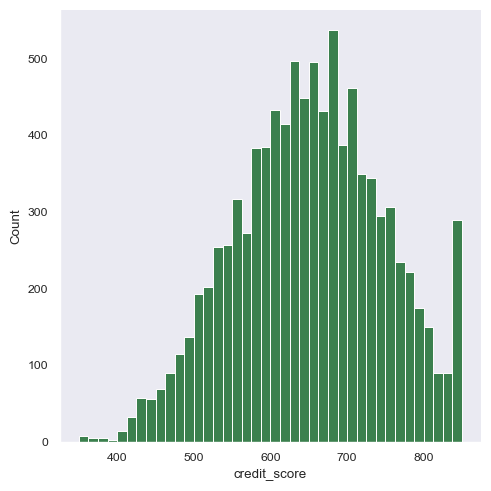

In [242]:
sns.displot(df.credit_score)

In [243]:
df.credit_score.describe()

count    9500.000000
mean      650.970737
std        96.377164
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: credit_score, dtype: float64

In [244]:
df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/952142757.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['credit_score'].fillna(df['credit_score'].mean(), inplace=True)


In [245]:
df.credit_score.isnull().sum()

0

We use mean to impute the null values because the distribution of data is normal and we can get the majority of values in the dataset to be mean. so we just use mean to fill the missing values

### Country

In [246]:
df.country.value_counts()

country
France     4871
Germany    2437
Spain      2392
Name: count, dtype: int64

In [247]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/2863300244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna(df['country'].mode()[0], inplace=True)


In [248]:
df.country.isnull().sum()

0

since it is categorical we use the maximum value from this, thus we use mode to find the max value in this category.

### Balance

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/1499853624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.balance)


<Axes: xlabel='balance', ylabel='Density'>

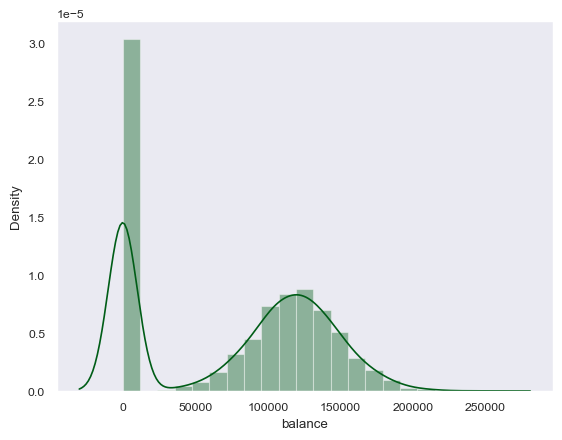

In [249]:
sns.distplot(df.balance)

In [250]:
df['balance'].fillna(df['balance'].median(), inplace=True)

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/1095514735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['balance'].fillna(df['balance'].median(), inplace=True)


In [251]:
df['balance'].isnull().sum()

0

We can see that mojority of the customers have balance 0, so we use median which is effective from the outliers and skewness, thus we use median to fill the missing values from this column.

In [252]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

We can see that all the null values have been removed.

## Explortory Data Analysis

The Featues here are customer_id , credit_score, country, gender, age, tenure, balance, products_number, credit_card, active_member, stimated_salary.  
The Target variable is churn.  
Let us go through the complete data in the following section and understand the relation between the features and target variable.

In [253]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619.000000,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608.000000,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502.000000,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,650.970737,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850.000000,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [254]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6117
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

### Plot Settings

In [255]:
def set_color(c):
    sns.set_palette(sns.color_palette(c, 10))
    
def set_size(*size):
    plt.figure(figsize=size)
    
def set_style(s):
    sns.set_style(s)
    
def set_context(c):
    sns.set_context(context=c)

### Univariant Analysis

#### Customer ID

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/1488240462.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.customer_id)


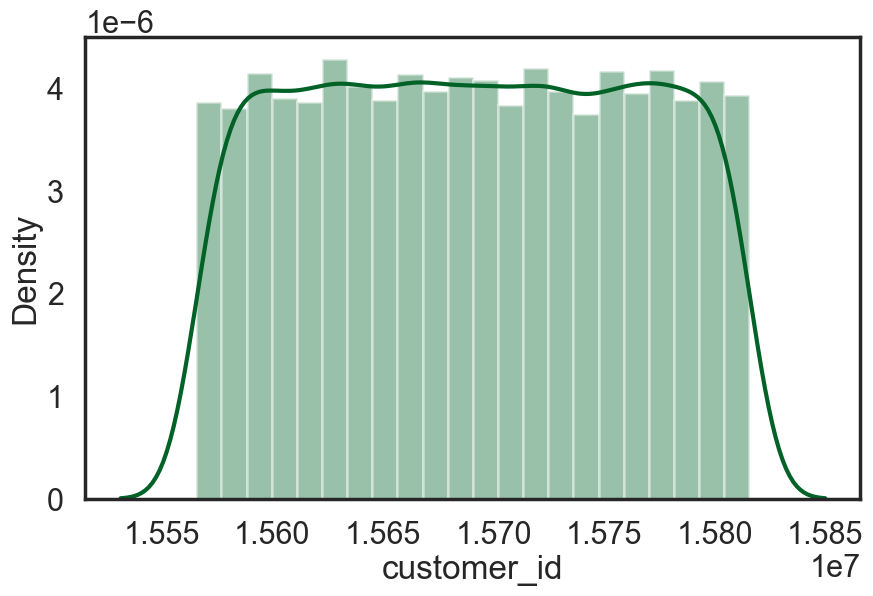

In [256]:
sns.set_style("white")
set_size(10,6)
sns.set_context(context='poster')
set_color("BuGn_r")
sns.distplot(df.customer_id)
plt.show()

Since customer_id is just a number we can remove that column as that does not add any value

In [257]:
df1 = df.drop(['customer_id'], axis=1).copy()

In [258]:
df1.shape

(10000, 11)

#### Credit Score

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/1172351726.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.credit_score)


<Axes: xlabel='credit_score', ylabel='Density'>

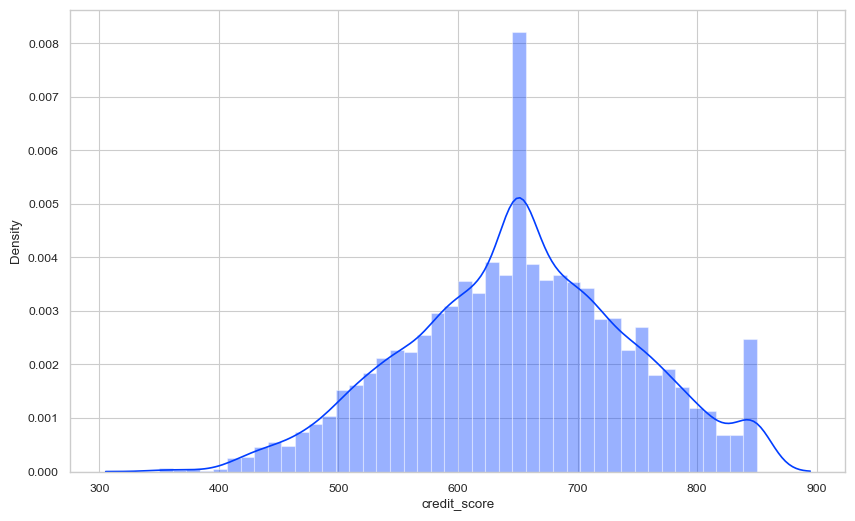

In [259]:
set_style("whitegrid")
set_size(10,6)
set_context("paper")
set_color("bright")
sns.distplot(df1.credit_score)

<Axes: ylabel='credit_score'>

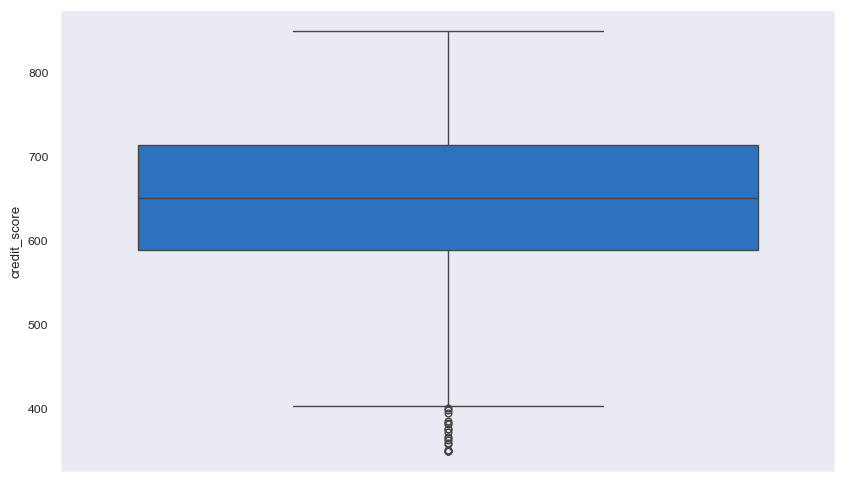

In [260]:
set_style("dark")
set_size(10,6)
set_context("paper")
set_color("terrain")
sns.boxplot(df.credit_score)

We can clearly see that there are outliers in the credit_score data, let us try to remove these outliers.

### Quartile calculation

In [261]:
df1.credit_score

0       619.000000
1       608.000000
2       502.000000
3       650.970737
4       850.000000
           ...    
9995    771.000000
9996    516.000000
9997    709.000000
9998    772.000000
9999    792.000000
Name: credit_score, Length: 10000, dtype: float64

In [262]:
np.percentile(df1.credit_score, 25)

589.0

In [263]:
def quartile_calc(ds):
    q1 = np.percentile(ds, 25)
    q3 = np.percentile(ds, 75)
    iqr = q3 - q1
    print(iqr)
    min_val = q1 - (1.5*iqr)
    max_val = q3 + (1.5*iqr)
    
    return (min_val, max_val)

125.0
401.5 901.5
(9981, 11)


<Axes: ylabel='credit_score'>

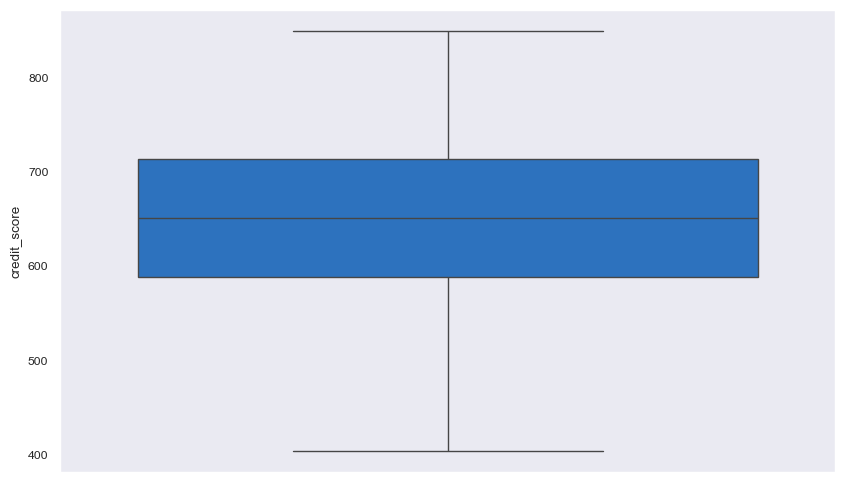

In [264]:
min_val, max_val = quartile_calc(df1.credit_score)
print(min_val, max_val)
df2 = df1[(df1.credit_score >= min_val) & (df1.credit_score <= max_val)]
print(df2.shape)

set_size(10, 6)
sns.boxplot(df2.credit_score)

Now we have removed these outliers and credit score is clean data

#### Age

In [265]:
df2.age.describe()

count    9981.000000
mean       38.913235
std        10.488580
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: age, dtype: float64

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/705737267.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2.age)


<Axes: xlabel='age', ylabel='Density'>

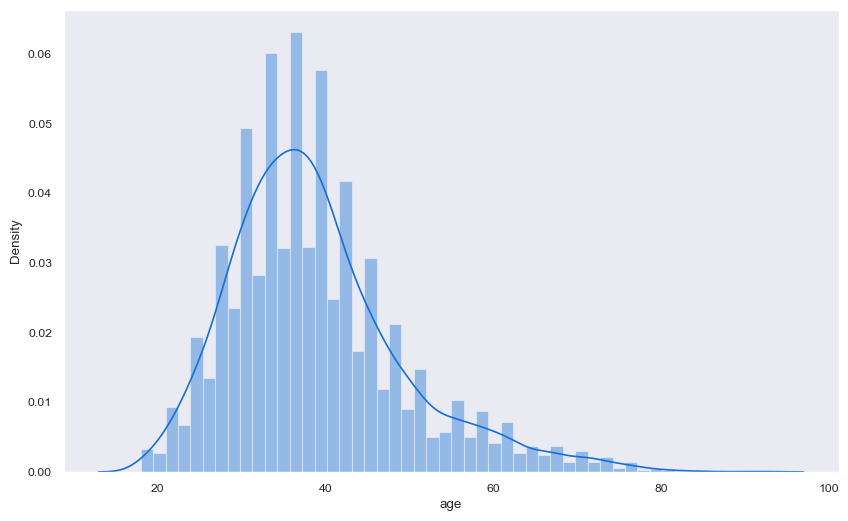

In [266]:
set_size(10,6)
sns.distplot(df2.age)

<Axes: ylabel='age'>

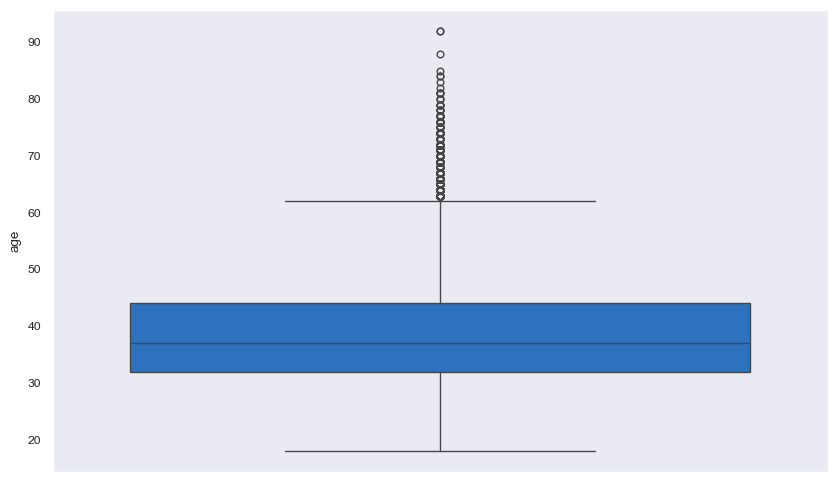

In [267]:
set_size(10, 6)
set_color("terrain")
sns.boxplot(df2.age)

We can see that there are outliers in this data, so let us try to remove these outliers

In [268]:
min_val, max_val = quartile_calc(df2.age)

df3 = df2[(df2.age >= min_val) & (df2.age<=max_val)]

12.0


<Axes: ylabel='age'>

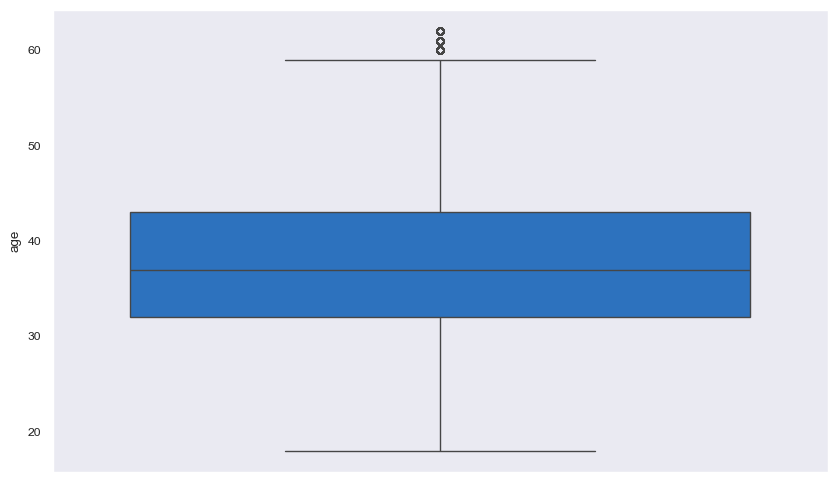

In [269]:
set_size(10, 6)
sns.boxplot(df3.age)

We have removed the outliers using Inter quartile method and can see we have only few outliers left, we can leave this

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/3241292091.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.age)


<Axes: xlabel='age', ylabel='Density'>

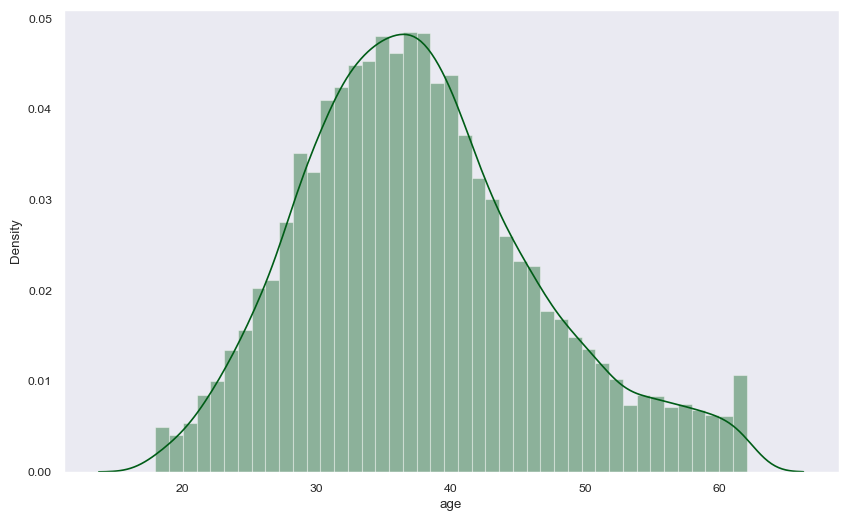

In [270]:
set_size(10,6)
set_color("ocean")
sns.distplot(df3.age)

#### Tenure

In [271]:
df3.tenure.describe()

count    9622.000000
mean        5.016525
std         2.888288
min         0.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/2611460541.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.tenure)


<Axes: xlabel='tenure', ylabel='Density'>

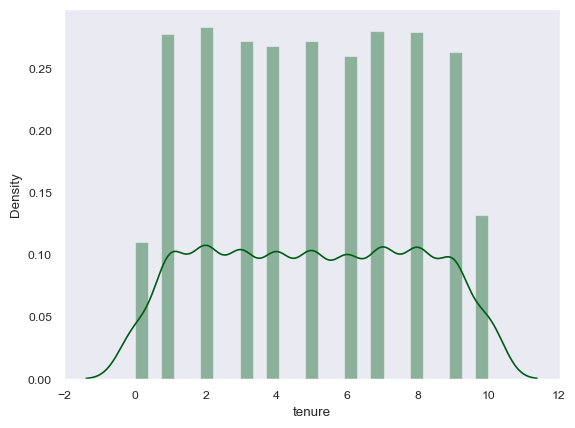

In [272]:
sns.distplot(df3.tenure)

<Axes: ylabel='count'>

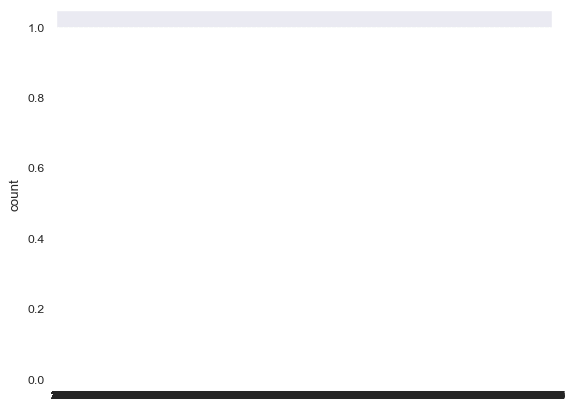

In [273]:
sns.countplot(df3.tenure)

<Axes: ylabel='tenure'>

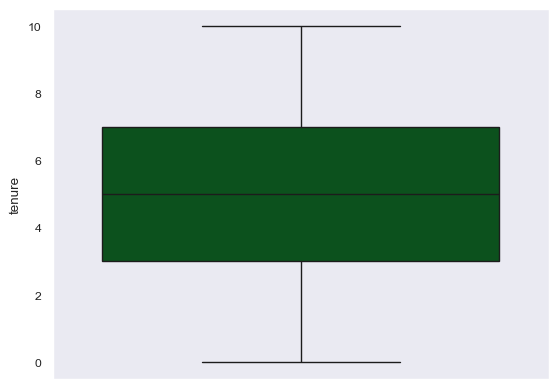

In [274]:
sns.boxplot(df3.tenure)

The tenure column has no outliers, it tells us how many years the customer have an account in the bank. so we can proceed with next column.

#### Balance

In [275]:
df3.balance.describe()

count      9622.000000
mean      77240.381200
std       61294.462788
min           0.000000
25%           0.000000
50%       97079.410000
75%      126476.562500
max      250898.090000
Name: balance, dtype: float64

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/3172095533.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.balance)


<Axes: xlabel='balance', ylabel='Density'>

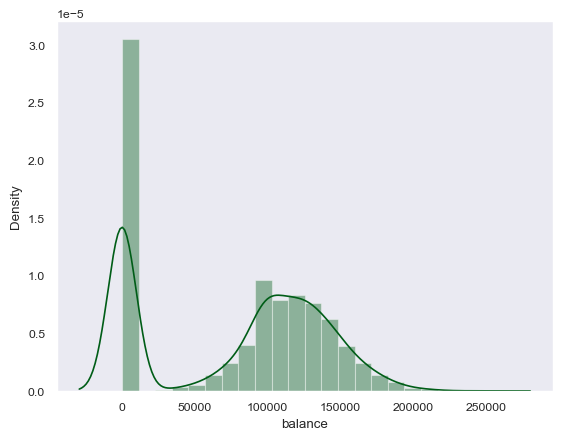

In [276]:
sns.distplot(df3.balance)

<Axes: ylabel='balance'>

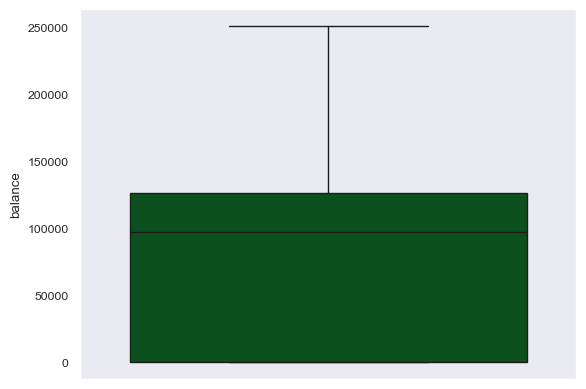

In [277]:
sns.boxplot(df3.balance)

In [278]:
df3.balance[df3.balance==0].shape[0]

3348

We can see that many customers have balance 0, so this is an important term to identify the churn of customers, let us see how churn is dependent on this column in bivariant analysis

#### products_number       

In [279]:
df3.products_number.describe()

count    9622.000000
mean        1.531179
std         0.580863
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: products_number, dtype: float64

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/3399320399.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.products_number)


<Axes: xlabel='products_number', ylabel='Density'>

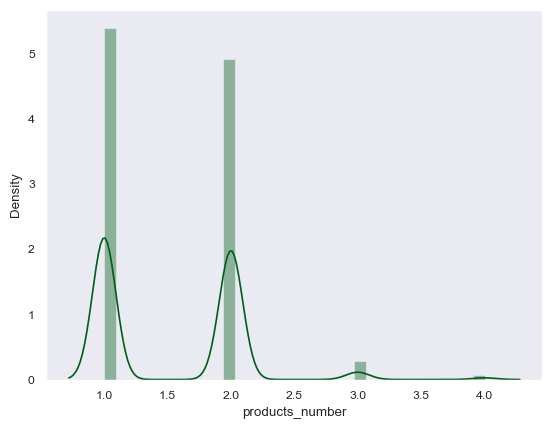

In [280]:
sns.distplot(df3.products_number)

<Axes: ylabel='count'>

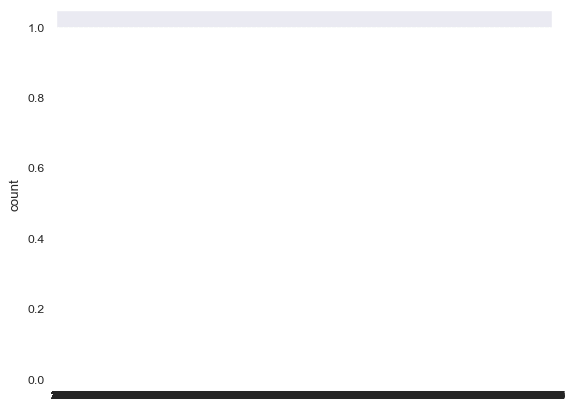

In [281]:
sns.countplot(df3.products_number)

<Axes: ylabel='products_number'>

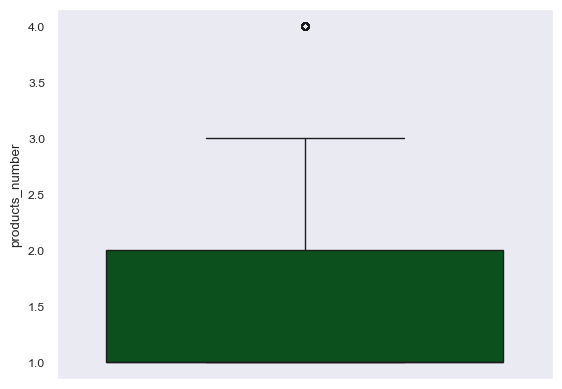

In [282]:
sns.boxplot(df3.products_number)

In [283]:
df3.products_number.value_counts()

products_number
1    4878
2    4435
3     251
4      58
Name: count, dtype: int64

We can clearly see that the products_number with value 4 occured only 58 times, but let us see if this has any significant imapact on churn and decide to drop it if not necessary in bivariant analysis

#### credit_card

In [284]:
df3.credit_card.describe()

count    9622.000000
mean        0.704947
std         0.456090
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: credit_card, dtype: float64

In [285]:
df.credit_card.value_counts()

credit_card
1    7055
0    2945
Name: count, dtype: int64

This column does not have any outliers, so let us move to next column

#### Active_member

In [287]:
df.active_member.describe()

count    10000.000000
mean         0.515100
std          0.499797
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: active_member, dtype: float64

In [288]:
df3.active_member.value_counts()

active_member
1    4846
0    4776
Name: count, dtype: int64

This column does not have any outliers, so we can proceed to next column

#### estimated_salary

In [290]:
df3.estimated_salary.describe()

count      9622.000000
mean     100119.508874
std       57525.806973
min          11.580000
25%       51012.472500
50%      100185.240000
75%      149447.960000
max      199992.480000
Name: estimated_salary, dtype: float64

/var/folders/hs/l750sd292jz0lrzlrjzn44180000gn/T/ipykernel_4986/2265629042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3.estimated_salary)


<Axes: xlabel='estimated_salary', ylabel='Density'>

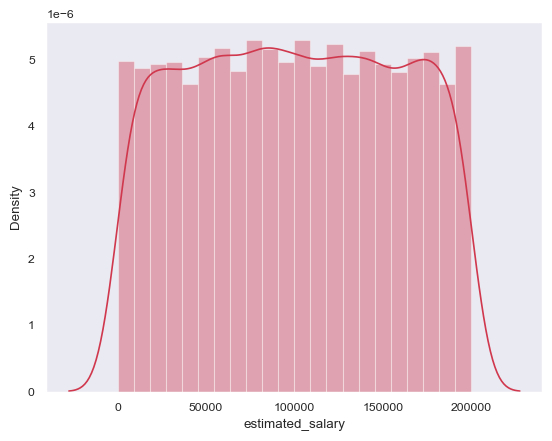

In [291]:
sns.distplot(df3.estimated_salary)

<Axes: ylabel='estimated_salary'>

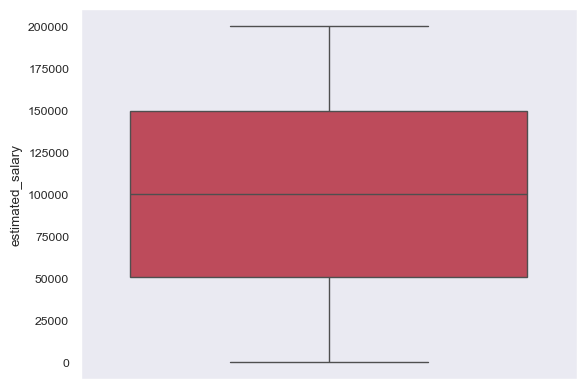

In [292]:
sns.boxplot(df3.estimated_salary)

This column does not have any outliers, let us see how this effects the customer churn

In [293]:
object_columns

country    object
gender     object
dtype: object

####  Country

In [294]:
country_counts = df3.country.value_counts()
country_counts

country
France     4973
Germany    2352
Spain      2297
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x3559c0510>,
 [Text(-0.05815531265809727, 1.0984616331987382, 'France'),
  Text(-0.7061795255488871, -0.8433922442704516, 'Germany'),
  Text(0.8048780839615249, -0.7497808146107933, 'Spain')])

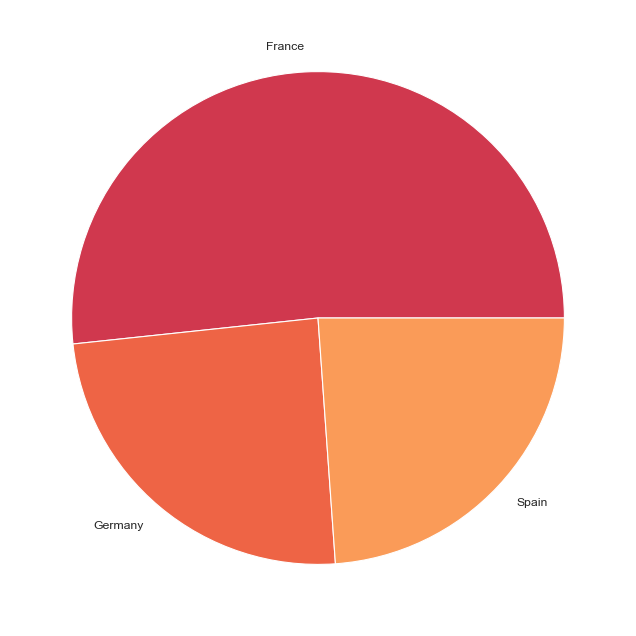

In [295]:
plt.figure(figsize=(8,8))
plt.pie(country_counts, labels=country_counts.index)

#### Gender

In [296]:
gender_counts = df3.gender.value_counts()
gender_counts

gender
Male      5257
Female    4365
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x355894210>,
 [Text(-0.15961581094239816, 1.0883578423005922, 'Male'),
  Text(0.1596157090429816, -1.0883578572448982, 'Female')])

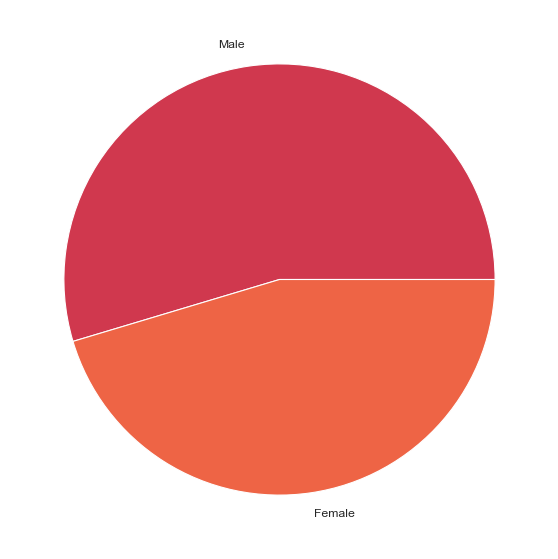

In [297]:
plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index)

#### Churn

In [298]:
df3.churn.value_counts()

churn
0    7677
1    1945
Name: count, dtype: int64

## Bivariant Analysis

#### Country vs Churn

<Axes: xlabel='country', ylabel='count'>

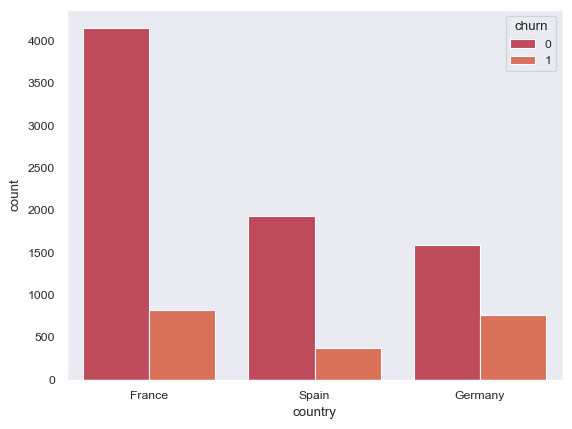

In [299]:
sns.countplot(x="country", hue="churn", data=df3)

The graph shows that Germany has more customer churn, let us calculate the churn percentage.

In [300]:
country_churn_val = df3.groupby(['country', 'churn']).size().unstack().reset_index()
country_churn_val

churn,country,0,1
0,France,4156,817
1,Germany,1594,758
2,Spain,1927,370


In [301]:
country_churn_val['churn_ratio'] = (country_churn_val[1]/country_churn_val[0])*100
country_churn_val

churn,country,0,1,churn_ratio
0,France,4156,817,19.658325
1,Germany,1594,758,47.553325
2,Spain,1927,370,19.200830


We can see that the churn ratio for germany(47.6%) is way more than that of France and Germany

#### Gender vs Churn

<Axes: xlabel='gender', ylabel='count'>

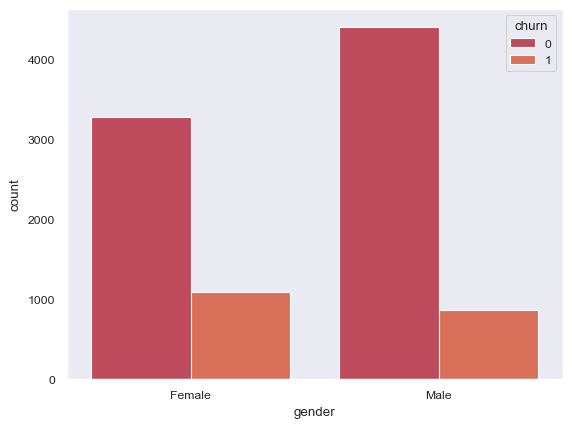

In [302]:
sns.countplot(x="gender", hue='churn', data=df3)

In [303]:
gender_churn_val = df3.groupby(['gender', 'churn']).size().unstack().reset_index()
gender_churn_val

churn,gender,0,1
0,Female,3278,1087
1,Male,4399,858


In [304]:
gender_churn_val['churn_ratio'] = (gender_churn_val[1]/gender_churn_val[0])*100
gender_churn_val

churn,gender,0,1,churn_ratio
0,Female,3278,1087,33.160464
1,Male,4399,858,19.504433


This shows that the churn ratio of females is more than that in males, so more females are moving away from the bank.

#### Age vs Churn

<Axes: xlabel='age', ylabel='churn'>

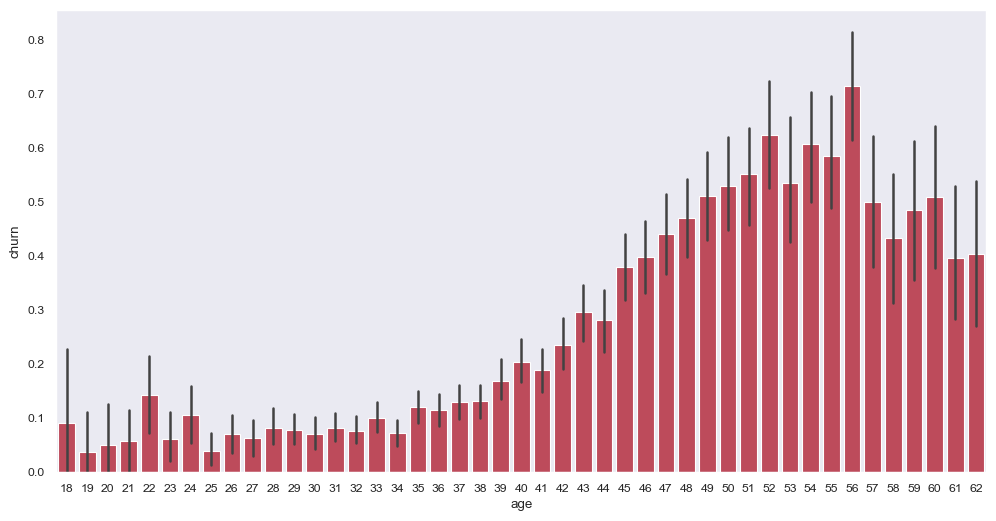

In [305]:
set_size(12,6)
sns.barplot(x='age', y='churn', data=df3)

<Axes: xlabel='churn', ylabel='age'>

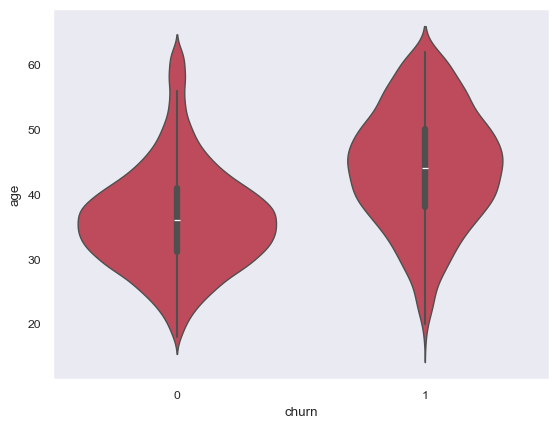

In [306]:
sns.violinplot(x='churn', y='age', data=df3)

The above clearly indicates that, the churn rate is high with ages 45 - 62, while the churn rate is lower with ages 18 - 44.

Credit Score vs Churn

<Axes: xlabel='credit_score', ylabel='churn'>

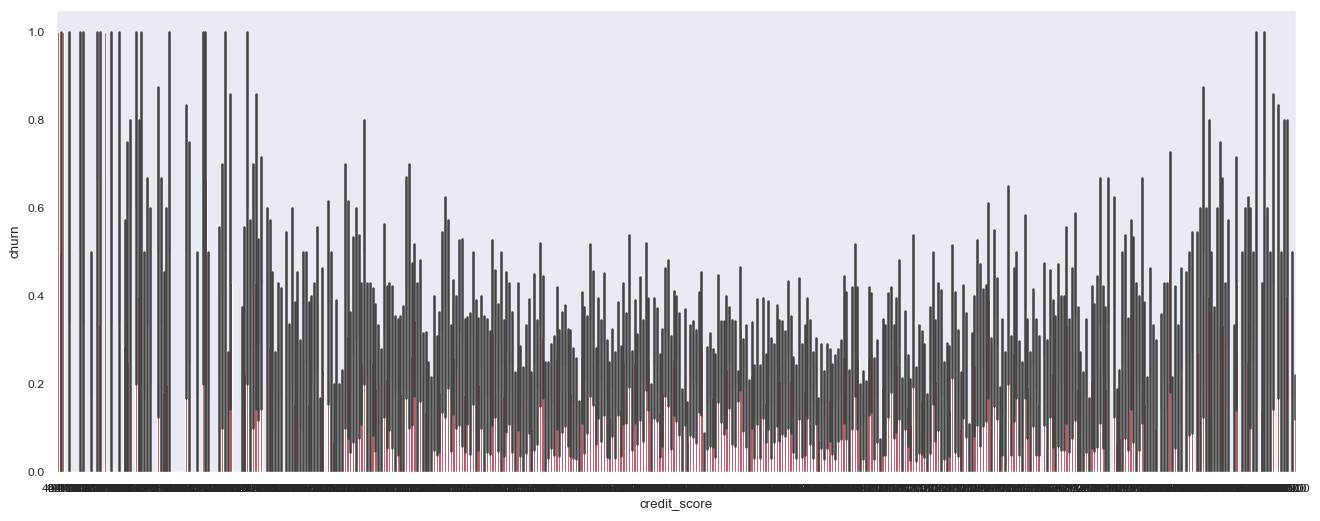

In [307]:
set_size(16,6)
plt.tight_layout()
sns.barplot(x='credit_score', y='churn', data=df3)

<Axes: xlabel='churn', ylabel='credit_score'>

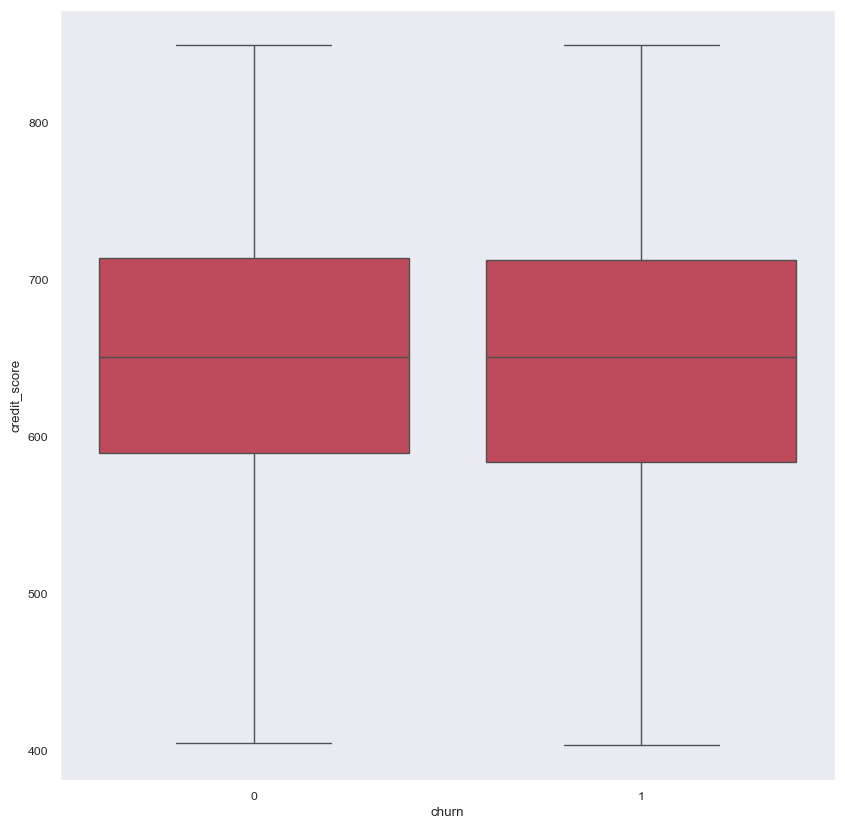

In [308]:
set_size(10,10)
sns.boxplot(x='churn', y='credit_score', data=df3)

<Axes: xlabel='credit_score', ylabel='churn'>

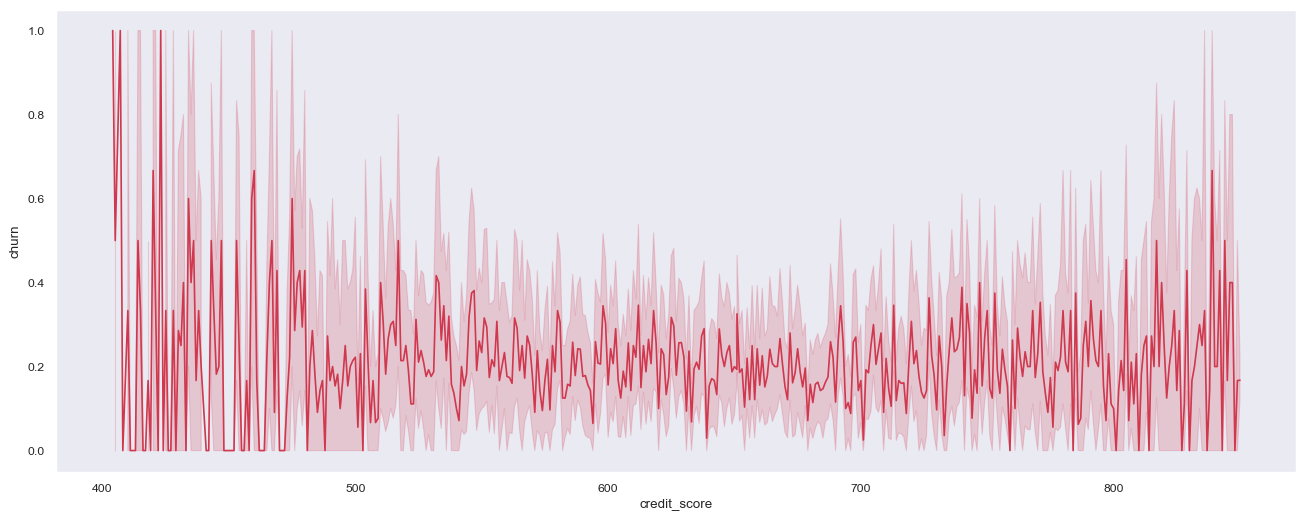

In [309]:
set_size(16,6)
sns.lineplot(x='credit_score', y='churn', data=df3)

<Axes: xlabel='credit_score', ylabel='Density'>

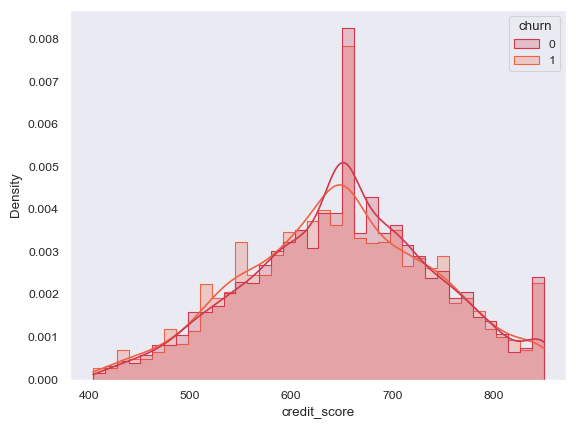

In [310]:
sns.histplot(data=df3, x='credit_score', hue='churn', kde=True, element='step', stat='density', common_norm=False)

We can see that the customers with Low credit score and high credit score have an increase in churn, so this indicates that the regular credit card score customers are less likely to change bank, where as persons with Low credit score and very high credit scores are likely to move away from the bank.

Tenure vs Churn

<Axes: xlabel='tenure', ylabel='churn'>

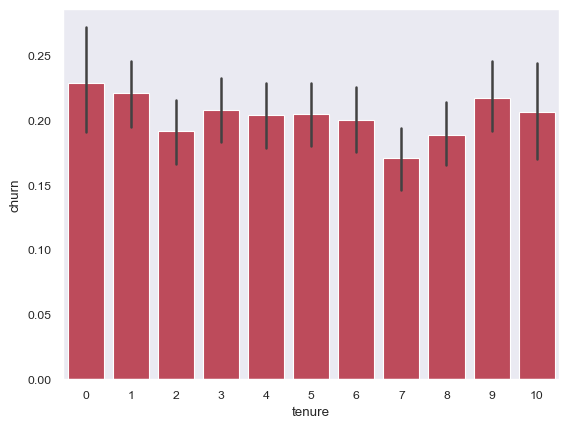

In [311]:
sns.barplot(x='tenure', y='churn', data=df3)

<Axes: xlabel='churn', ylabel='tenure'>

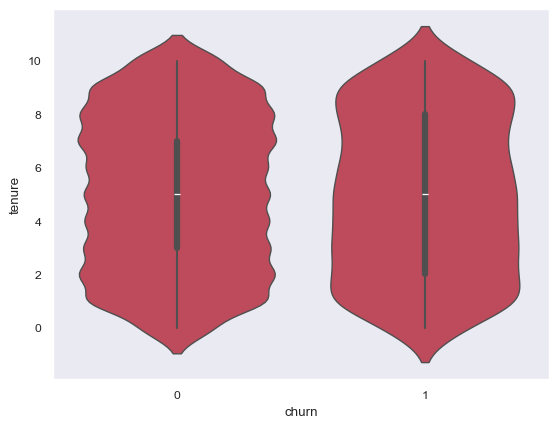

In [312]:
sns.violinplot(x='churn', y='tenure', data=df3)

<Axes: xlabel='tenure', ylabel='Density'>

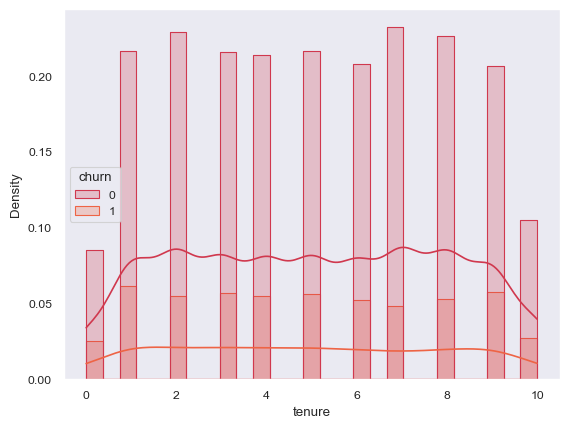

In [313]:
sns.histplot(data=df3, x='tenure', hue='churn', kde=True, element='step', stat='density')

<Axes: xlabel='tenure', ylabel='churn'>

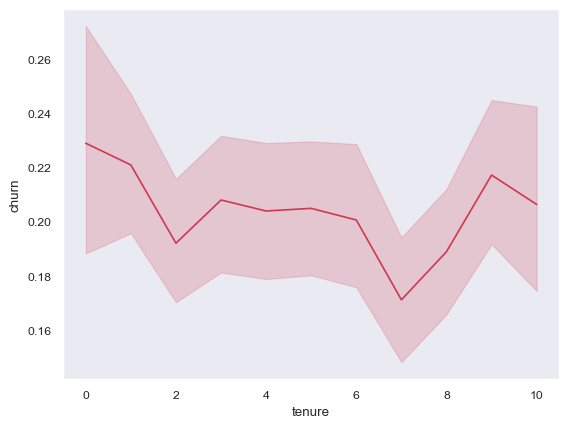

In [314]:
sns.lineplot(x='tenure', y='churn', data=df3)

THis shows that customers with few years with bank or too high years with bank are likely to move away, where as customers with 1 to 8 years with bank are less likely to more away.

Balance vs Churn

<Axes: xlabel='churn', ylabel='balance'>

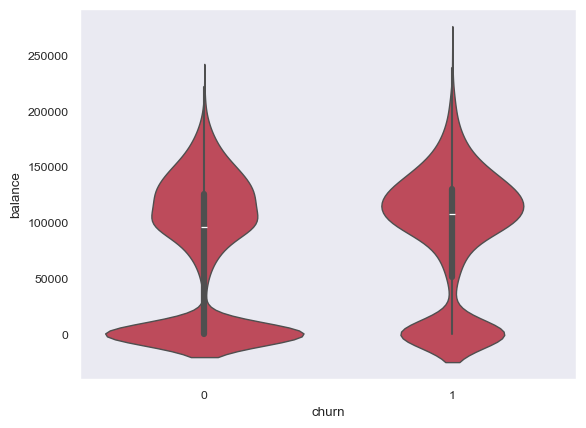

In [315]:
sns.violinplot(x='churn', y='balance', data=df3)

<Axes: xlabel='balance', ylabel='Density'>

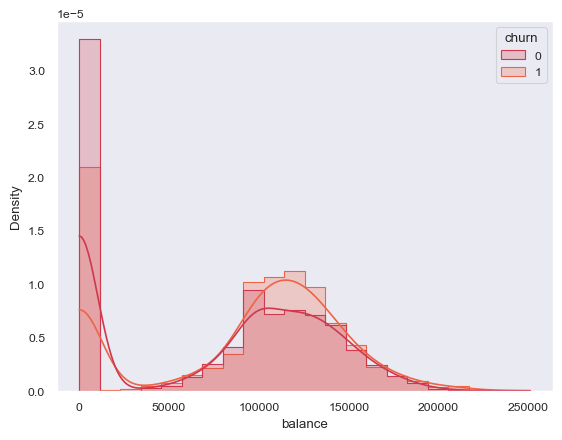

In [316]:
sns.histplot(data=df3, x='balance', hue='churn', kde=True, element='step', stat='density', common_norm=False)

<Axes: xlabel='balance', ylabel='churn'>

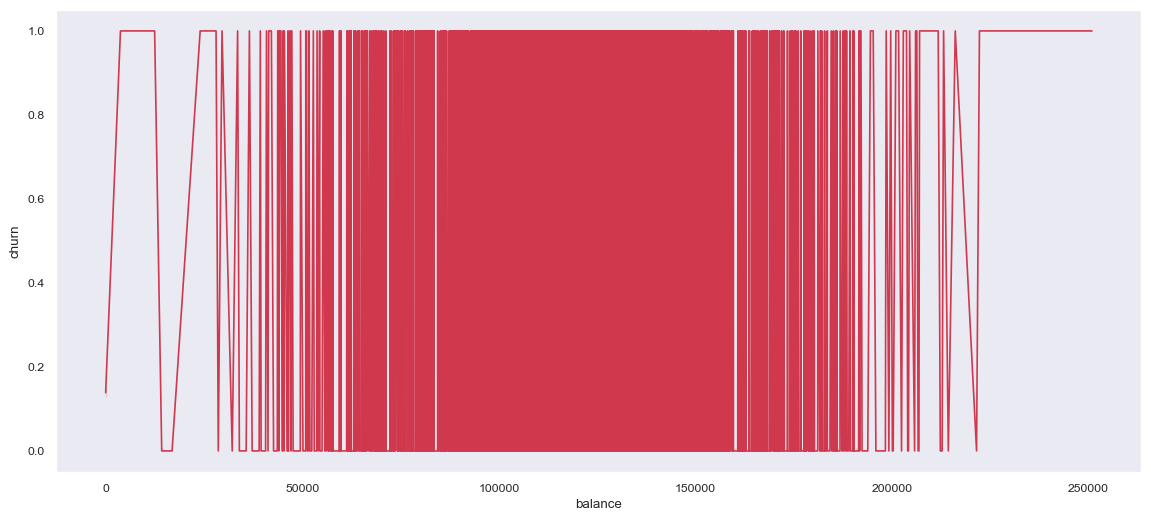

In [317]:
set_size(14, 6)
sns.lineplot(x='balance', y='churn', data=df3)

In [318]:
zero_balance = df3[df3.balance==0]['churn']
zero_balance.value_counts()

churn
0    2884
1     464
Name: count, dtype: int64

In [319]:
low_balance = df3[df3.balance<=50000]['churn']
low_balance_counts = low_balance.value_counts()

print(low_balance_counts)

print("Percentage of churn with balance <=50000 :", (low_balance_counts.values[1]/low_balance_counts.values[0])*100)

churn
0    2929
1     486
Name: count, dtype: int64
Percentage of churn with balance <=50000 : 16.592693752133833


In [320]:
high_balance = df3[df3.balance>50000]['churn']
high_balance_counts = high_balance.value_counts()
print(high_balance_counts)

print("Percentage of churn with balance >50000 :", (high_balance_counts[1]/high_balance_counts[0])*100)

churn
0    4748
1    1459
Name: count, dtype: int64
Percentage of churn with balance >50000 : 30.728727885425442


Customers with low balance tend to stay(<=50000), The churn increases with increase in the balance amount of customer and high bank balance customers are more likely to leave the bank.

Products Number vs Churn

<Axes: xlabel='products_number', ylabel='churn'>

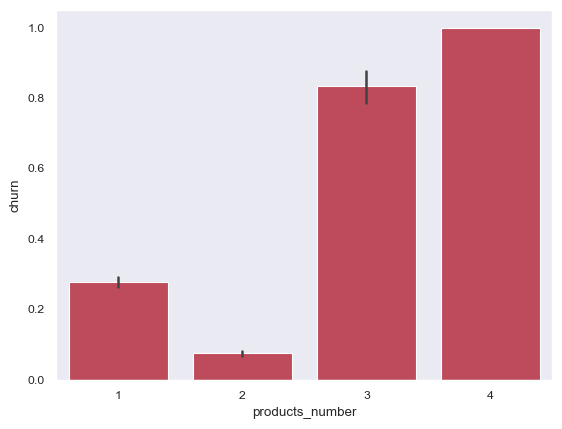

In [321]:
sns.barplot(x='products_number', y='churn', data=df3)

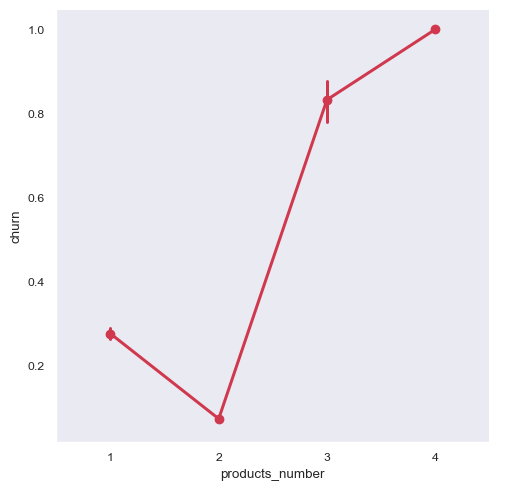

In [322]:
sns.catplot(x='products_number', y='churn', data=df3, kind='point')

In [323]:
product_churn = df3.groupby(['products_number', 'churn']).size().unstack().reset_index().fillna(0)
product_churn['churn_percentage'] = (product_churn[1]/product_churn[0])*100
product_churn

churn,products_number,0,1,churn_percentage
0,1,3529.0,1349.0,38.226126
1,2,4106.0,329.0,8.012664
2,3,42.0,209.0,497.619048
3,4,0.0,58.0,inf


This clearly shows that, customers using products greater than 2 are most likely to move away from bank, No customer using products 4 stays with the bank.

Credit Card vs Churn

<Axes: xlabel='credit_card', ylabel='churn'>

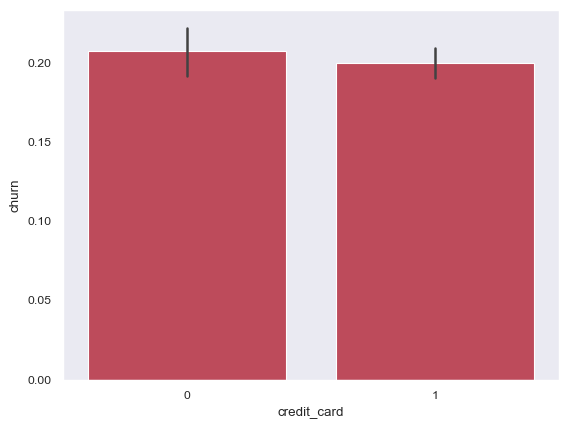

In [324]:
sns.barplot(x='credit_card', y='churn', data=df3)

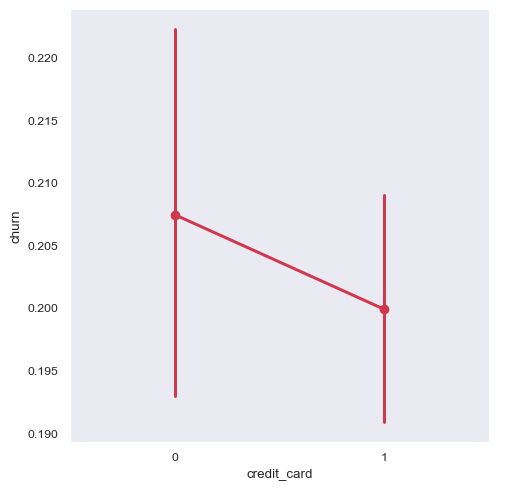

In [325]:
sns.catplot(x='credit_card', y='churn', data=df3, kind='point')

In [326]:
credit_card_churn = df3.groupby(['credit_card', 'churn']).size().unstack().reset_index()
credit_card_churn['churn_percentage'] = (credit_card_churn[1]/credit_card_churn[0])*100
credit_card_churn

churn,credit_card,0,1,churn_percentage
0,0,2250,589,26.177778
1,1,5427,1356,24.986180


This shows that, credit card does have a little effect in customer churn.

Active Member vs Churn

<Axes: xlabel='active_member', ylabel='churn'>

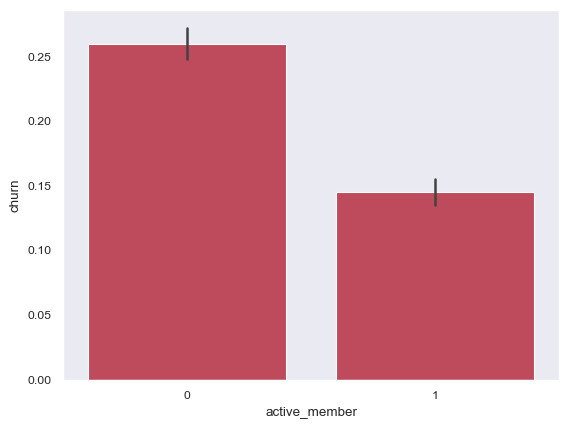

In [327]:
sns.barplot(x='active_member', y='churn', data=df3)

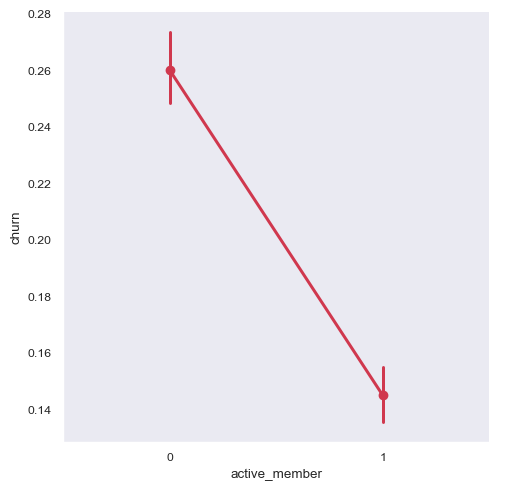

In [328]:
sns.catplot(x='active_member', y='churn', data=df3, kind='point')

In [329]:
active_member_churn = df3.groupby(['active_member', 'churn']).size().unstack().reset_index()
active_member_churn['churn_percentage'] = (active_member_churn[1]/active_member_churn[0])*100
active_member_churn

churn,active_member,0,1,churn_percentage
0,0,3534,1242,35.144312
1,1,4143,703,16.968380


This shows that the active custoer is less likely to leave the bank, where as inactive customers are twice as likely to leave the bank compared to active customers.

Estimated Salary vs Churn

<Axes: xlabel='churn', ylabel='estimated_salary'>

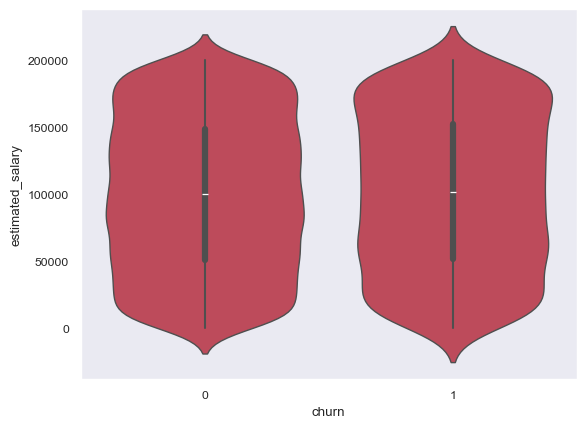

In [330]:
sns.violinplot(y='estimated_salary', x='churn', data=df3)

<Axes: xlabel='estimated_salary', ylabel='Density'>

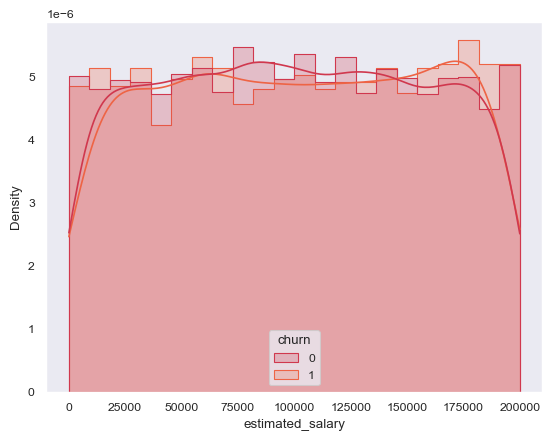

In [331]:
sns.histplot(data=df3, x='estimated_salary', hue='churn', kde=True, element='step', stat='density', common_norm=False)

There is no clear relationship between the estimated_salary and churn of the customer.

### Multivariant Analysis

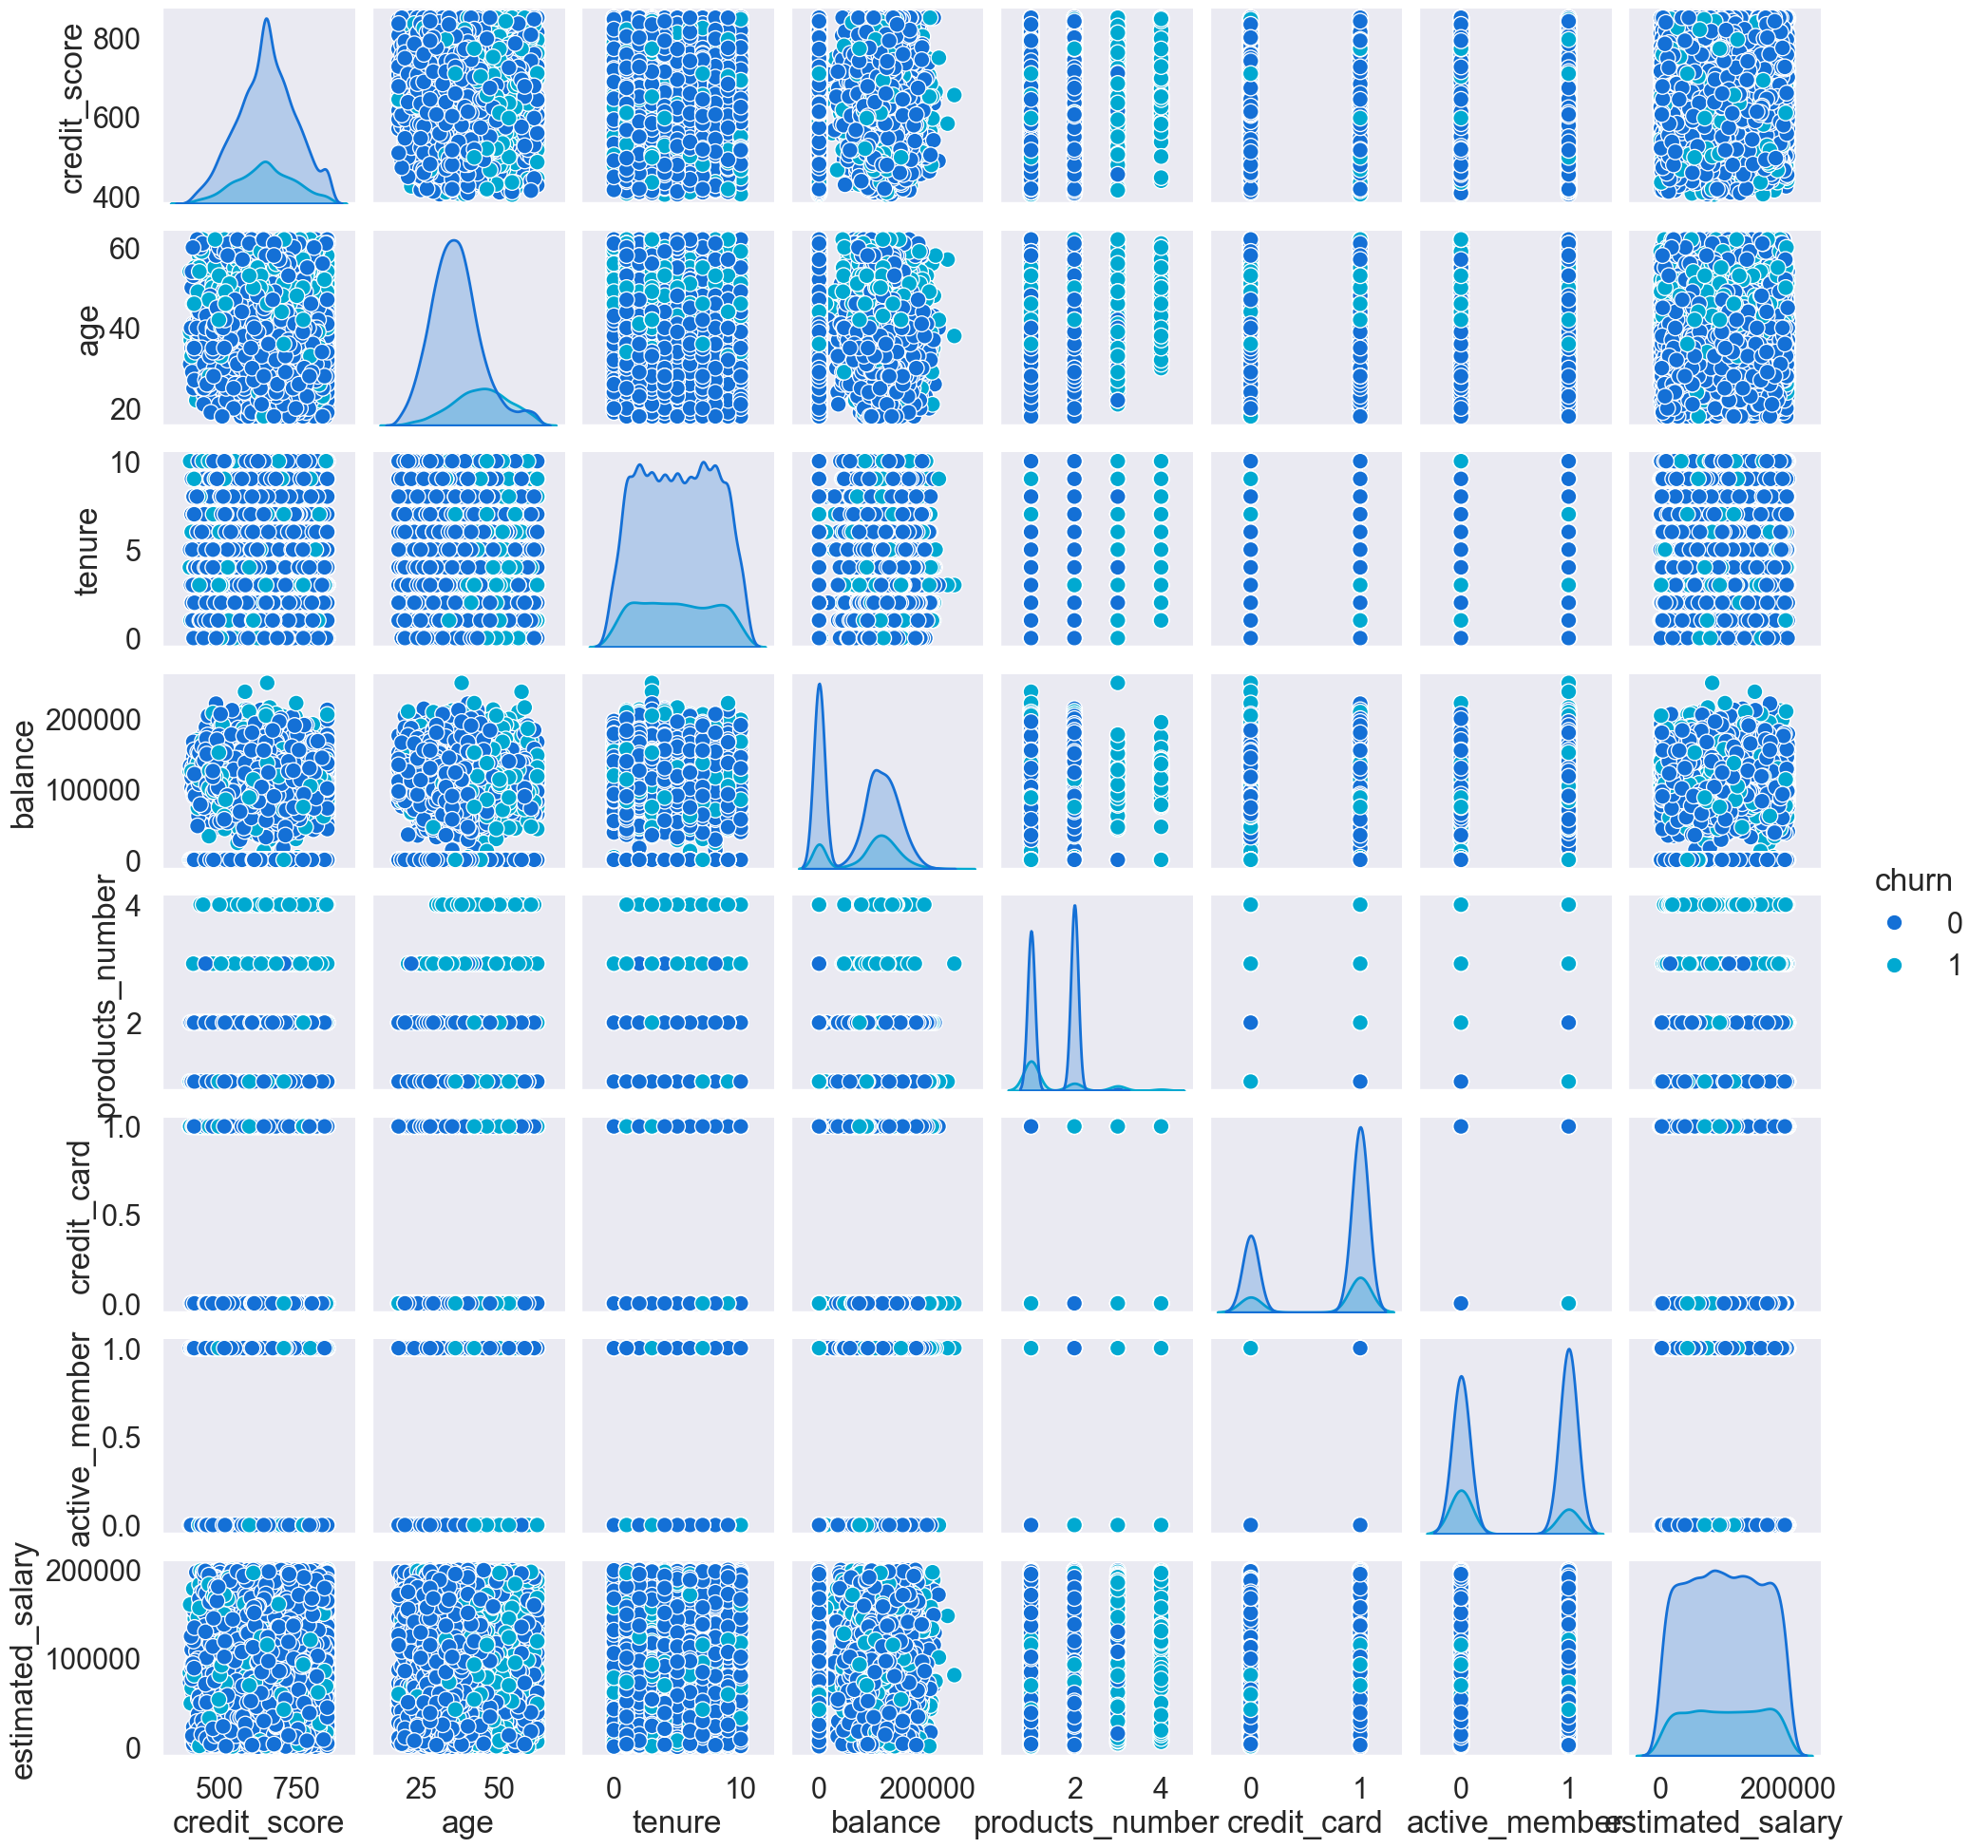

In [332]:
set_context("poster")
set_color('terrain')
sns.pairplot(data=df3, hue='churn')

In [335]:
df3.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619.000000,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608.000000,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502.000000,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,650.970737,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850.000000,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [337]:
numeric_df = df3.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

correlation_matrix

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,-0.010040,-0.001699,0.004548,0.013105,-0.001374,0.020680,0.003329,-0.015218
age,-0.010040,1.000000,-0.010744,0.041854,-0.032226,-0.016287,0.018242,-0.005549,0.358290
tenure,-0.001699,-0.010744,1.000000,-0.012302,0.015150,0.019955,-0.027139,0.009571,-0.013095
balance,0.004548,0.041854,-0.012302,1.000000,-0.299958,-0.012868,-0.006471,0.009712,0.110793
products_number,0.013105,-0.032226,0.015150,-0.299958,1.000000,0.002753,0.011061,0.013467,-0.049965
credit_card,-0.001374,-0.016287,0.019955,-0.012868,0.002753,1.000000,-0.012385,-0.010045,-0.008581
active_member,0.020680,0.018242,-0.027139,-0.006471,0.011061,-0.012385,1.000000,-0.009653,-0.143152
estimated_salary,0.003329,-0.005549,0.009571,0.009712,0.013467,-0.010045,-0.009653,1.000000,0.009344
churn,-0.015218,0.358290,-0.013095,0.110793,-0.049965,-0.008581,-0.143152,0.009344,1.000000


<Axes: >

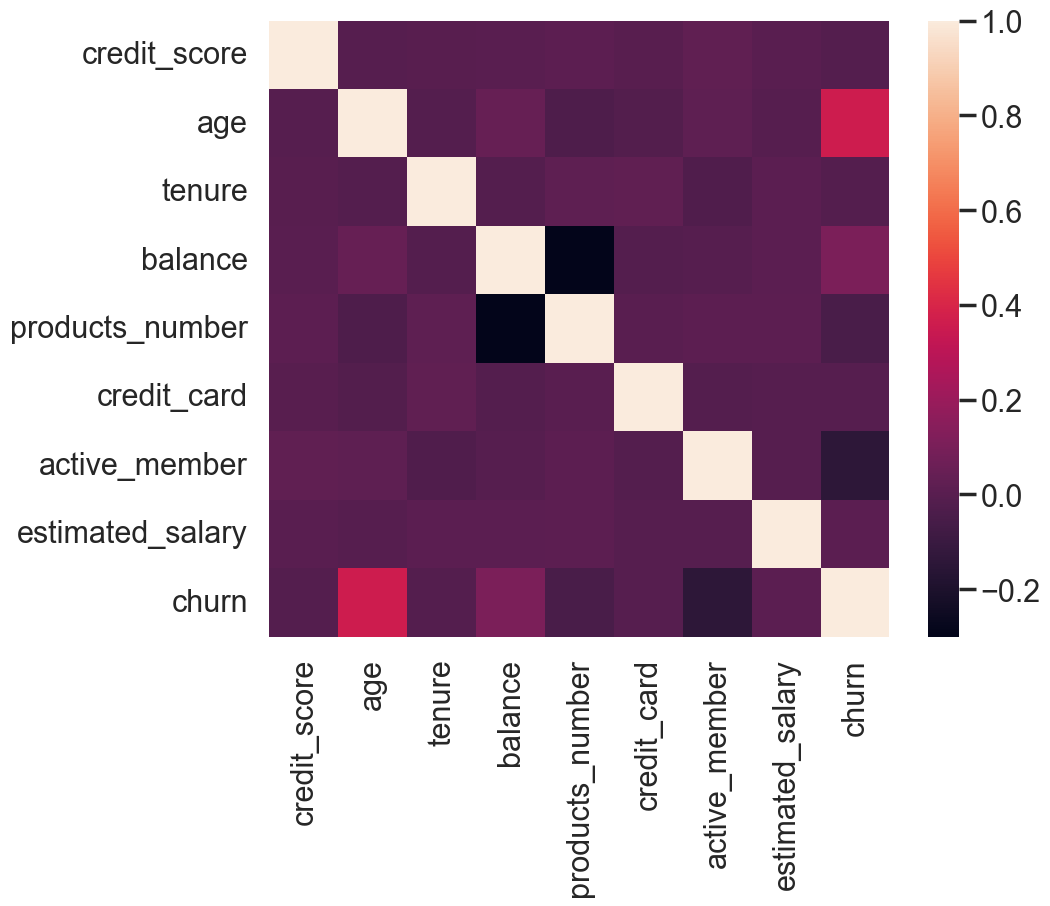

In [338]:
set_size(10,8)
sns.heatmap(correlation_matrix)

From the EDA we can conclude that customers with more age are likely to leave the bank,  
customers with very low and very high credit score are likely to leave the bank,  
custoers with balance >50000 are more likely to leave,  
customer with products 2 are most likely ot stay, on contrary to customers with products 4 will leave the bank,  
an active customer is likely to stay with the bank,  
Males are more likely to stay with the bank compared to females,  
Customer from germany is most likely to leave the bank compared to other countries.

# Statistical Analysis

### t-test

In [339]:
alpha = 0.05  # Significance level

# t-test for Numerical Variable
def t_test(col):
    churned = df[df['churn'] == 1][col].dropna()
    non_churned = df[df['churn'] == 0][col].dropna()
    t_stat, p_value = ttest_ind(churned, non_churned, nan_policy='omit')
    
    print(f"\nT-test for {col}:")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Reject H₀: {col} is significantly different between churned and non-churned customers.")
    else:
        print(f"Fail to reject H₀: No significant difference in {col} between churned and non-churned customers.")

### ANOVA

In [340]:
# ANOVA for Numerical Variable
def anova(col):
    groups = [df[df['churn'] == i][col].dropna() for i in [0, 1]]
    f_stat, p_value = f_oneway(*groups)

    print("\nANOVA for col:")
    print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Reject H₀: {col} differs between churned and non-churned customers.")
    else:
        print(f"Fail to reject H₀: No significant difference in {col}.")

### Chi_Squared Test

In [341]:
def chi_squared(col):
    contingency_table = pd.crosstab(df[col], df['churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    print(f"\nChi-Square Test for {col}:")
    print(f"Chi-Square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < alpha:
        print(f"Reject H₀: {col} has a significant relationship with churn.")
    else:
        print(f"Fail to reject H₀: No significant relationship between {col} and churn.")

### Numerical Variables

Age (Numerical - t-test)  
Null Hypothesis (H₀): Age is the same for both churn groups.  
Alternative Hypothesis (H₁): Age is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, age significantly affects churn, meaning churned customers are in a different age group than non-churned ones.  

In [342]:
t_test('age')


T-test for age:
T-statistic: 29.7668, P-value: 0.0000
Reject H₀: age is significantly different between churned and non-churned customers.


Tenure (Numerical - ANOVA)  
Null Hypothesis (H₀): Tenure is the same for both churn groups.  
Alternative Hypothesis (H₁): Tenure is significantly different for churned customers.  
Test Used: ANOVA (Analysis of Variance)  
Interpretation: If p-value < 0.05, tenure impacts churn. Otherwise, we fail to reject H₀.  

In [343]:
anova('tenure')


ANOVA for col:
F-statistic: 1.9602, P-value: 0.1615
Fail to reject H₀: No significant difference in tenure.


Balance (Numerical - t-test)  
Null Hypothesis (H₀): Balance is the same for both churn groups.  
Alternative Hypothesis (H₁): Balance is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, balance significantly impacts churn, meaning customers with different balance levels churn differently.  

In [344]:
t_test('balance')


T-test for balance:
T-statistic: 11.3433, P-value: 0.0000
Reject H₀: balance is significantly different between churned and non-churned customers.


Products Number (Numerical - t-test)  
Null Hypothesis (H₀): The number of products owned is the same for both churn groups.  
Alternative Hypothesis (H₁): The number of products owned is significantly different for churned customers.  
Test Used: Independent t-test  }
Interpretation: If p-value < 0.05, the number of products affects churn.

In [345]:
t_test('products_number')


T-test for products_number:
T-statistic: -4.7870, P-value: 0.0000
Reject H₀: products_number is significantly different between churned and non-churned customers.


Credit Score (Numerical - t-test)  
Null Hypothesis (H₀): Credit score is the same for both churn groups.  
Alternative Hypothesis (H₁): Credit score is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, churned and non-churned customers have significantly different credit scores.  

In [346]:
t_test('credit_score')


T-test for credit_score:
T-statistic: -2.8475, P-value: 0.0044
Reject H₀: credit_score is significantly different between churned and non-churned customers.


Credit Card (Numerical - t-test)  
Null Hypothesis (H₀): Credit card ownership is the same for both churn groups.  
Alternative Hypothesis (H₁): Credit card ownership is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, having a credit card significantly affects churn.

In [347]:
t_test('credit_card')


T-test for credit_card:
T-statistic: -0.7137, P-value: 0.4754
Fail to reject H₀: No significant difference in credit_card between churned and non-churned customers.


Active Member (Numerical - t-test)  
Null Hypothesis (H₀): Active member status is the same for both churn groups.  
Alternative Hypothesis (H₁): Active member status is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, active membership significantly affects churn.

In [348]:
t_test('active_member')


T-test for active_member:
T-statistic: -15.8051, P-value: 0.0000
Reject H₀: active_member is significantly different between churned and non-churned customers.


Estimated Salary (Numerical - t-test)  
Null Hypothesis (H₀): Estimated salary is the same for both churn groups.  
Alternative Hypothesis (H₁): Estimated salary is significantly different for churned customers.  
Test Used: Independent t-test  
Interpretation: If p-value < 0.05, estimated salary impacts churn.  

In [349]:
t_test('estimated_salary')


T-test for estimated_salary:
T-statistic: 1.2097, P-value: 0.2264
Fail to reject H₀: No significant difference in estimated_salary between churned and non-churned customers.


### Categorical Variables

Country (Categorical - Chi-Square Test)  
Null Hypothesis (H₀): Churn is independent of the country.  
Alternative Hypothesis (H₁): Churn is dependent on the country.   
Test Used: Chi-Square Test of Independence  
Interpretation: If p-value < 0.05, churn rates significantly vary by country, meaning location impacts churn. Otherwise, we fail to reject H₀.  

In [350]:
chi_squared('country')


Chi-Square Test for country:
Chi-Square Statistic: 292.2703, P-value: 0.0000
Reject H₀: country has a significant relationship with churn.


Gender (Categorical - Chi-Square Test)  
Null Hypothesis (H₀): Churn is independent of gender.  
Alternative Hypothesis (H₁): Churn is related to gender.  
Test Used: Chi-Square Test of Independence  
Interpretation: If p-value < 0.05, gender significantly influences churn. Otherwise, we fail to reject H₀.

In [351]:
chi_squared('gender')


Chi-Square Test for gender:
Chi-Square Statistic: 112.9186, P-value: 0.0000
Reject H₀: gender has a significant relationship with churn.


## Exploratory Questions

1. Data Understanding

The dataset contains customer data, with each column representing:

customer_id: Unique identifier for each customer.

credit_score: A numerical score indicating the customer’s creditworthiness.

country: The country where the customer is located (e.g., France, Germany, Spain).

gender: The gender of the customer (Male/Female).

age: The age of the customer.

tenure: Number of years the customer has been with the bank.

balance: The account balance of the customer.

products_number: Number of banking products the customer uses.

credit_card: Whether the customer has a credit card (1 = Yes, 0 = No).

active_member: Whether the customer is an active bank member (1 = Yes, 0 = No).

estimated_salary: Estimated annual salary of the customer.

churn: The target variable (1 = Customer churned, 0 = Customer stayed).



The dataset has 10,000 rows and 12 columns, with a mix of numerical and categorical variables.

Some numerical variables (age, balance, estimated salary) have large ranges.

The churn rate is expected to be imbalanced (few customers churn).

2. Data Cleaning  
**Missing Values & Handling**  
credit_score (500 missing values): Imputed using the median to preserve distribution.

country (300 missing values): Filled using the mode (most frequent country).

balance (400 missing values): Set to 0 as a valid assumption (many customers already have balance = 0).

**Duplicates**  
Checked for duplicates, and no duplicates were found.

**Outliers & Handling**  
Detected using boxplots for numerical variables.

Age: Some extreme high values (above 70) were detected. They are removed using the IQR method.

Credit Score: A few lopw credit scores <400  were found, but these were removed from the dataset using the IQR method.




3. Visualization  
**Histograms & Boxplots Insights**  
Age: Right-skewed, with more customers aged 30-40.

Balance: Many customers have zero balance, while a few have very high balances.

Credit Score: Normally distributed but slightly left-skewed.

**Relationships Between Variables**  
Age vs. Churn: Older customers tend to churn more.

Credit Score vs. Churn: Customers with lower credit scores tend to churn.

Balance vs. Churn: Higher balance customers churn less.

4. Statistical Analysis  

**What hypothesis tests did you use, and why did you choose them?**

t-tests were used for numerical features (credit_score, balance, age, , credit_card, active_member) to compare differences between churned and non-churned groups.

ANOVA test was used for Tenure column to compare between the Churned and non_churned groups.

Chi-squared tests were performed for categorical variables (country, gender) to check for independence with churn.  
  


**What were the results of the tests? What do they tell you about the data?**
If the p-value < 0.05, the null hypothesis was rejected, indicating a significant relationship.

If the p-value ≈ 0, the difference between groups was highly significant (e.g., active_member likely has a strong influence on churn).

If p-value > 0.05, the null hypothesis was not rejected, meaning the variable may not be a strong predictor of churn.

Example results:

credit_score: If p-value is low, it means churned customers have significantly different credit scores.

active_member: A low p-value suggests that active members are significantly less likely to churn.

country: If p-value > 0.05, then the country may not significantly impact churn.

5. Conclusions  
**What insights have you gained from the analysis?**

Customers with lower credit scores are more likely to churn.

Active members tend to stay with the bank, showing a strong association with retention.

Account balance does not significantly impact churn due to many zero-balance accounts.

Older customers may have different churn behavior compared to younger customers.

**What recommendations or further analysis would you suggest based on your findings?**

Implement loyalty programs for inactive customers to reduce churn.

Offer financial products based on credit scores to retain high-risk customers.

Use machine learning models (e.g., logistic regression, random forest) to predict churn more effectively.

Further analyze the zero-balance customers—do they have active accounts or are they dormant?